In [1]:
%pylab inline 
#Pour charger la bibliothèque de 
#CalculScientifique Numpy et celle de traçage Matplotlib

Populating the interactive namespace from numpy and matplotlib


L'étude se fera sur une période de $365$ jours et on aura une population de $12$ millions d'habitants

In [2]:
T=365
N=12000000

On part du jours où la tunisie comptait $18$ cas confirmés. Ainsi I0 est le nombre initial d'individus infectés, S0 le nombre d'individus suseptibles (pas encore malades) et R0 le nombre de peronne rétablis (malades et rétablis par la suite) ici c'est zéro dans notre cas.

In [3]:
S0=(N-18)/N
I0=18/N
R0=0

On fait l'hypothèse dans un premier temps que la maladie n'est pas létale. Le système se let sous cette forme.

$$\left\{
\begin{array}{r c l}
S'(t) &=& -\beta S(t) I(t)\\
I'(t) &=& \beta S(t) I(t) - \alpha I(t)\\
R'(t) &=& \alpha I(t)
\end{array} \right. $$


Nous utiliserons les données récoltées pour trouver le paramètre $\beta$. Pour $\alpha$ on fera l'hypothèse grossière que c'est égal à $\frac{1}{14}$ tenant comte du temps de guérison qui est de 14 jours.

In [4]:
import csv #Pour charger la bibliothèque csv 
#qui manipule les fichiers de données

In [5]:
results = []
with open("Tunisia.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)

In [6]:
A=asarray(results)
n=shape(A)[1]
t=linspace(0,len(A[0,10:]),len(A[0,10:]))
b=polyfit(t,A[0,10:],1)

In [7]:
B=poly1d(b)

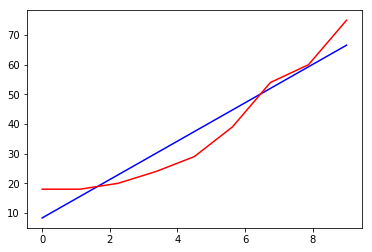

In [8]:
plot(t,B(t),'b',t,A[0,10:],'r')

In [9]:
beta=(b[0]/N)/(S0*I0)
beta

0.35967132139998614

On utilise ici la méthode d'Euler pour la résolution

In [10]:
S=zeros(T)
R=zeros(T)
I=zeros(T)
S[0]=S0
R[0]=R0
I[0]=I0
for i in range (T-1):
    S[i+1]=S[i]-beta*S[i]*I[i]
    I[i+1]=I[i]+beta*S[i]*I[i]-(1/14)*I[i]
    R[i+1]=R[i]+1/(14)*I[i]

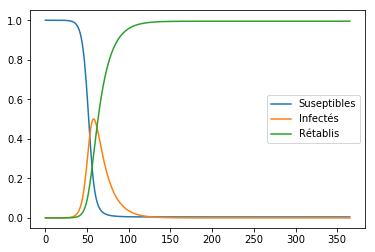

In [11]:
t=linspace(0,T,T)
plot(t,S,label = 'Suseptibles')
plot(t,I,label='Infectés')
plot( t,R,label='Rétablis')
legend() 
show()

In [12]:
print("nombre estimé des infectés au pic de la pandémie", max(I)*N)

nombre estimé des infectés au pic de la pandémie 6008107.37493


In [13]:
where(max(I)==I)

(array([58], dtype=int64),)